## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

## Reading CSV

In [3]:
df = pd.read_csv('911.csv')

## Checking Data Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


## DataFrame Check

In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## TOP 5 ZIP Codes

In [6]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

## TOP 5 Township

In [7]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

## unique title count

In [8]:
df['title'].nunique()

110

## Creating new features

**Creating a new column 'Reason', if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.**

In [9]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])

In [10]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


**__Most Common Reason__**

In [13]:
df['Reason'].nunique()

3

In [14]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

**__Most common Reason Plotting__**

In [15]:
import seaborn as sns

<AxesSubplot:xlabel='Reason', ylabel='count'>

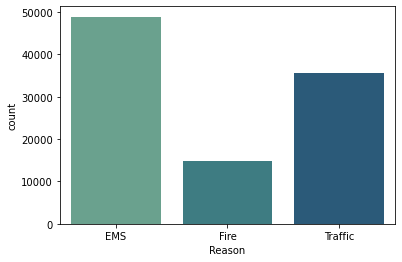

In [16]:
sns.countplot(x = 'Reason',data=df,palette='crest')

<AxesSubplot:xlabel='Reason', ylabel='count'>

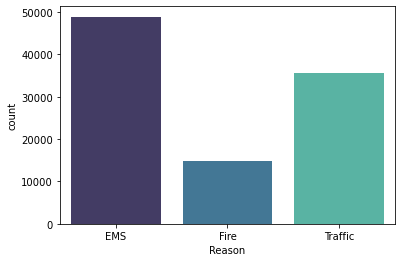

In [17]:
sns.countplot(x = 'Reason',data=df,palette='mako')

<AxesSubplot:xlabel='Reason', ylabel='count'>

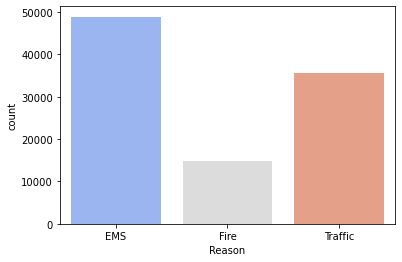

In [18]:
sns.countplot(x = 'Reason',data=df,palette='coolwarm')

In [19]:
type(df['timeStamp'].iloc[0])

str

In [20]:
df['timeStamp'].iloc[0]

'2015-12-10 17:40:00'

**__Dividing TimeStrap into Date Time and making columns Hour Month and Day of Week__**

In [21]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [22]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [23]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


**__Mapping Day of the Week From Number to a Specific Day__**

In [24]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [25]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   lat          99492 non-null  float64       
 1   lng          99492 non-null  float64       
 2   desc         99492 non-null  object        
 3   zip          86637 non-null  float64       
 4   title        99492 non-null  object        
 5   timeStamp    99492 non-null  datetime64[ns]
 6   twp          99449 non-null  object        
 7   addr         98973 non-null  object        
 8   e            99492 non-null  int64         
 9   Reason       99492 non-null  object        
 10  Hour         99492 non-null  int64         
 11  Month        99492 non-null  int64         
 12  Day of Week  99492 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(6)
memory usage: 9.9+ MB


**countplot of the Day of Week column wrt Reason column**

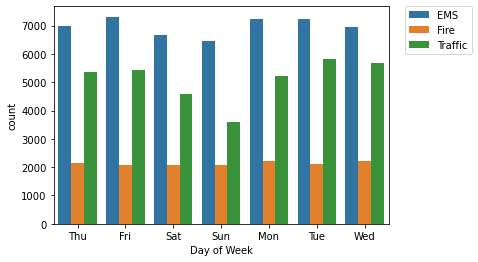

In [27]:
sns.countplot(x='Day of Week', data=df, hue='Reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**Now same for Month**

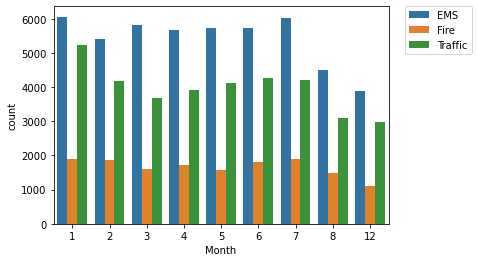

In [28]:
sns.countplot(x='Month', data=df, hue='Reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

__NOTE:  Saw misssing values and hence grouping by month__

In [29]:
byMonth = df.groupby(by='Month').count()

In [30]:
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


__Lineplot of the title wrt month__

<AxesSubplot:xlabel='Month'>

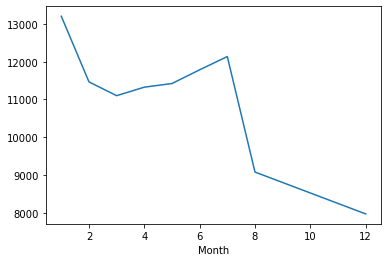

In [31]:
byMonth['title'].plot()

**__Targettting the missing values wrt the linear model plot__**

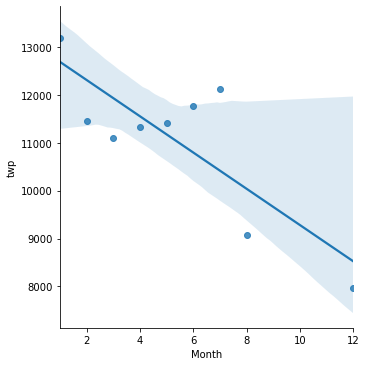

In [32]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

## **Creating date column** 

In [33]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   lat          99492 non-null  float64       
 1   lng          99492 non-null  float64       
 2   desc         99492 non-null  object        
 3   zip          86637 non-null  float64       
 4   title        99492 non-null  object        
 5   timeStamp    99492 non-null  datetime64[ns]
 6   twp          99449 non-null  object        
 7   addr         98973 non-null  object        
 8   e            99492 non-null  int64         
 9   Reason       99492 non-null  object        
 10  Hour         99492 non-null  int64         
 11  Month        99492 non-null  int64         
 12  Day of Week  99492 non-null  object        
 13  Date         99492 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(7)
memory usage: 10.6+ MB


## Counting the Calls as per date values

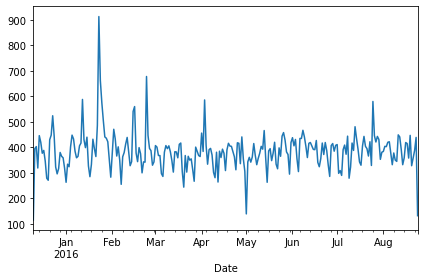

In [35]:
df['Date'] = pd.to_datetime(df['Date'])

df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

## Creating date wise plot WRT Reason of the Calls

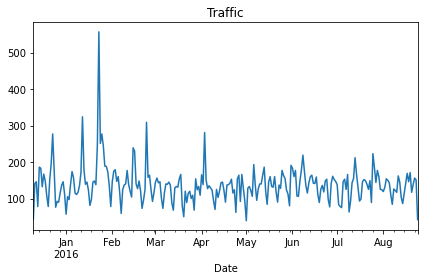

In [36]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

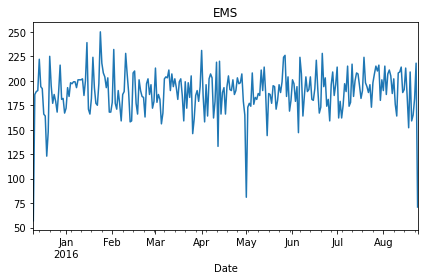

In [37]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

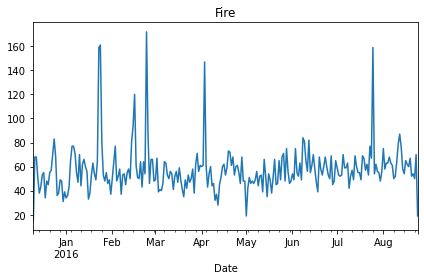

In [38]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

## Unstacking the day of week and hour 

In [39]:
byDOW = df.groupby(by=['Day of Week', 'Hour']).count()['Reason'].unstack()
byDOW

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


## Heatmap of the unstacked data

<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

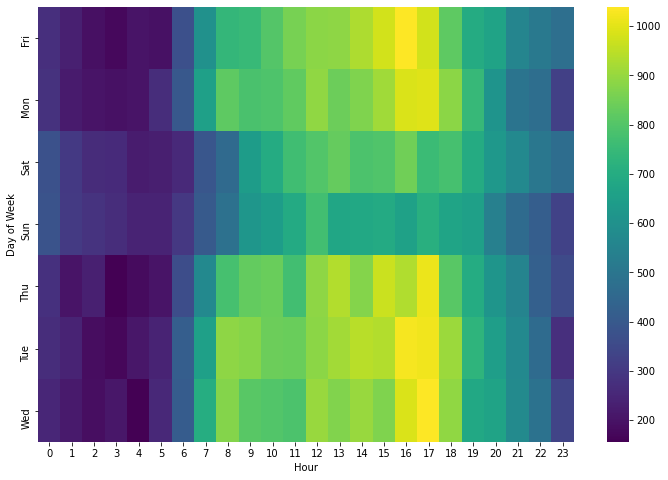

In [40]:
plt.figure(figsize=(12,8))
sns.heatmap(byDOW,cmap='viridis')

## Clustermap of the unstacked data

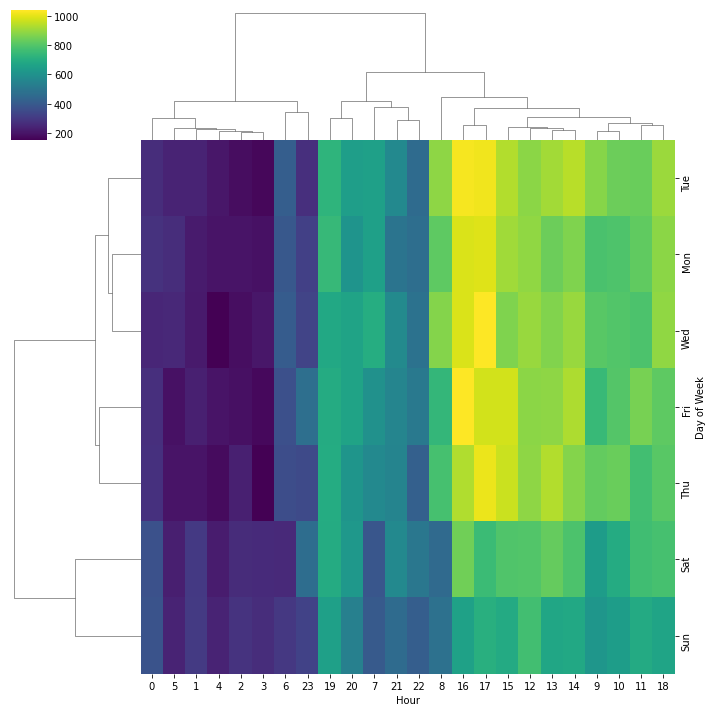

In [41]:
sns.clustermap(byDOW,cmap='viridis')

## Unstacking by Month

In [118]:
monthAScolumn = df.groupby(['Day of Week','Month']).count()['Reason'].unstack()
monthAScolumn

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

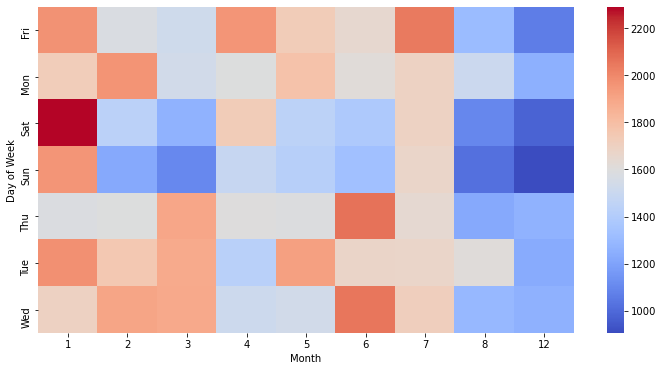

In [121]:
plt.figure(figsize=(12,6))
sns.heatmap(monthAScolumn,cmap='coolwarm')

<Figure size 864x432 with 0 Axes>

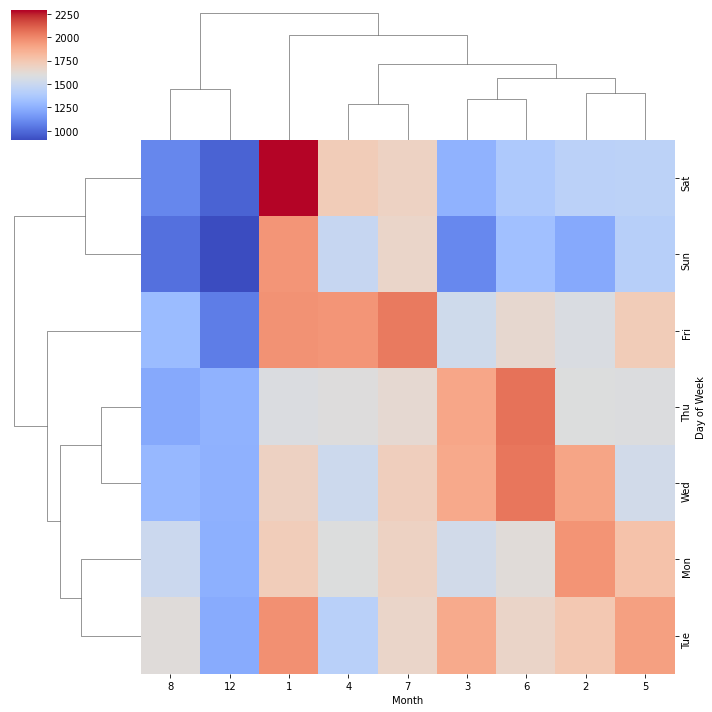

In [122]:
plt.figure(figsize=(12,6))
sns.clustermap(monthAScolumn,cmap='coolwarm')

## Continued